## 1. Localização de objeto utilizando diferenças quadráticas

//colocar a equação aqui depois?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def diferenca_quadratica(img, obj):
    
    num_rows, num_cols = img.shape
    num_rows_obj, num_cols_obj = obj.shape
    
    half_num_rows_obj = num_rows_obj//2
    half_num_cols_obj = num_cols_obj//2
    
    img_padded = np.pad(img, ((half_num_rows_obj, half_num_rows_obj), (half_num_cols_obj, half_num_cols_obj)),
    mode='constant')

    img_diff = np.zeros((num_rows, num_cols))
    for row in range(num_rows):
        for col in range(num_cols):
            patch = img_padded[row:row+num_rows_obj, col:col+num_cols_obj]
            diff_region = (patch - obj)**2
            img_diff[row, col] = np.sum(diff_region)
            
    return img_diff    

In [15]:
img = np.array([[5, 2, 0, 1, 4],
               [2, 4, 1, 3, 2],
               [3, 2, 3, 2, 4],
               [0, 2, 3, 4, 5],
               [2, 1, 0, 2, 3]])

img_objeto = np.array([[2, 3, 2],
                      [2, 3, 4],
                      [1, 0, 2]])

img_diff = diferenca_quadratica(img, img_objeto)
print(img_diff)

[[38. 61. 46. 34. 47.]
 [23. 33. 29. 29. 45.]
 [18. 11. 27. 32. 61.]
 [27. 15.  0. 15. 43.]
 [32. 31. 23. 22. 33.]]


In [16]:
def encontra_minimo(img):
    
    num_rows, num_cols = img.shape
    menor_valor = img[0,0]
    indice_menor_valor = [0,0]
    for row in range(num_rows):
        for col in range(num_cols):
            valor = img[row, col]
            if valor<menor_valor:
                menor_valor = valor
                indice_menor_valor = [row, col]
                
    return menor_valor, indice_menor_valor

In [17]:
menor_valor, indice = encontra_minimo(img_diff)
print(indice)

[3, 2]


## 2. Localização de objeto utilizando correlação

In [18]:
import scipy.signal

def diferenca_quadratica_corr(img, obj):
    
    w = np.ones(obj.shape)
    imgOw = scipy.signal.correlate(img**2, w, mode='same')
    imgOobj = scipy.signal.correlate(img, obj, mode='same')
    
    img_diff = imgOw + np.sum(obj**2) - 2*imgOobj
    
    return img_diff

In [19]:
img_diff_corr = diferenca_quadratica_corr(img, img_objeto)
print(img_diff_corr)

[[38. 61. 46. 34. 47.]
 [23. 33. 29. 29. 45.]
 [18. 11. 27. 32. 61.]
 [27. 15.  0. 15. 43.]
 [32. 31. 23. 22. 33.]]


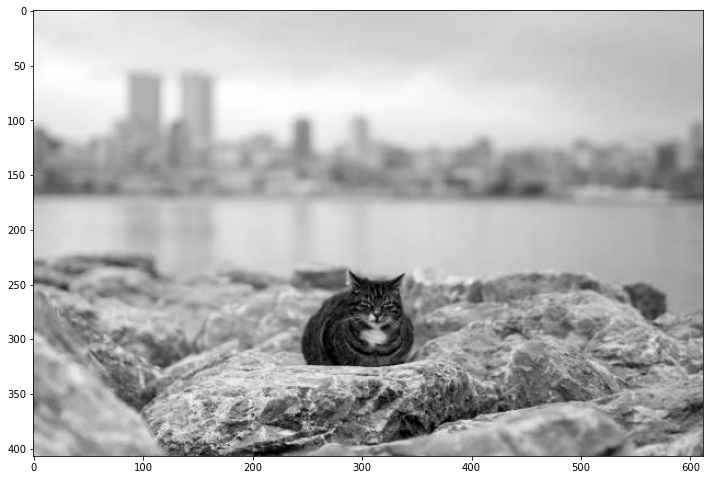

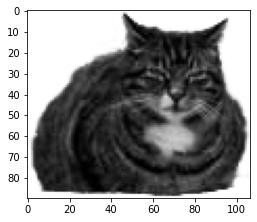

In [23]:
img_g = plt.imread('imgs/imagem_global.tiff')
img_g = img_g.astype(float)
img_o = plt.imread('imgs/gato.tiff')
img_o = img_o.astype(float)

plt.figure(figsize=[12,12])
plt.imshow(img_g, 'gray')
plt.figure(figsize=[4,4])
plt.imshow(img_o, 'gray')

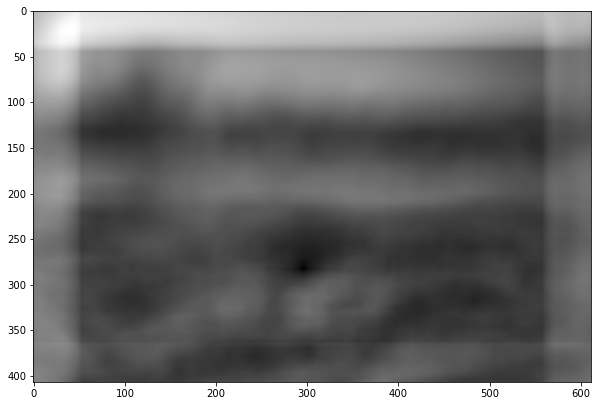

In [24]:
img_diff = diferenca_quadratica(img_g, img_o)
plt.figure(figsize=[10,10])
plt.imshow(img_diff, 'gray')

In [25]:
menor_valor, indice = encontra_minimo(img_diff)
print(menor_valor)
print(indice)

40844301.0
[282, 296]


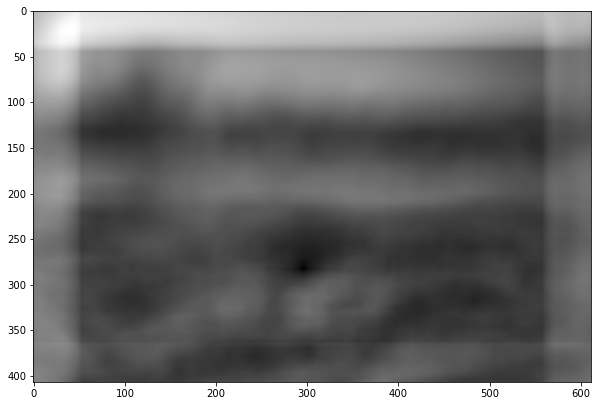

In [26]:
img_diff_corr = diferenca_quadratica_corr(img_g, img_o)
plt.figure(figsize=[10,10])
plt.imshow(img_diff_corr, 'gray')

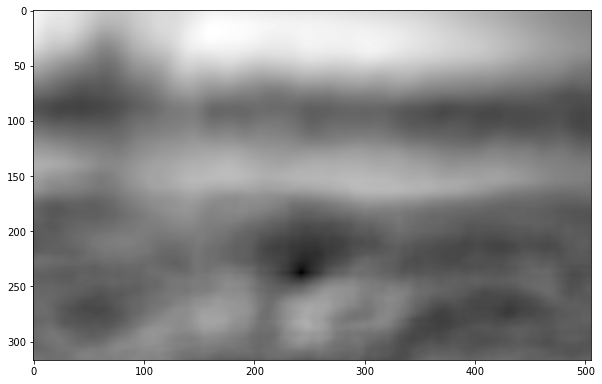

In [27]:
half_num_row_obj = img_o.shape[0]//2
half_num_col_obj = img_o.shape[1]//2
img_diff_corr_center = img_diff_corr[half_num_row_obj:-half_num_row_obj, half_num_col_obj:-half_num_col_obj]
plt.figure(figsize=[10, 10])
plt.imshow(img_diff_corr_center, 'gray')

In [41]:
import cv2
def draw_rectangle(img_g, center, size):
    
    half_num_row_obj = size[0]//2
    half_num_col_obj = size[1]//2
    
    img_rectangle = img_g.copy()
    pt1 = (center[1]-half_num_col_obj, center[0]-half_num_row_obj)
    pt2 = (center[1]+half_num_col_obj, center[0]+half_num_row_obj)
    cv2.rectangle(img_rectangle, pt1=pt1, pt2=pt2, color=255, thickness=3)
    
    return img_rectangle

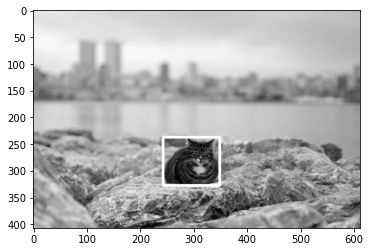

In [42]:
img_square = draw_rectangle(img_g, indice, img_o.shape)
plt.imshow(img_square, 'gray')

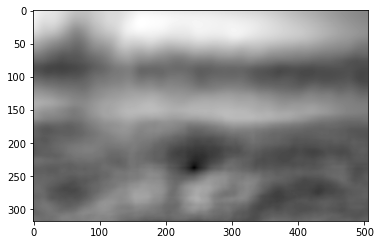

In [43]:
res = cv2.matchTemplate(img_g.astype(np.uint8), img_o.astype(np.uint8), method=cv2.TM_SQDIFF)
plt.imshow(res, 'gray')

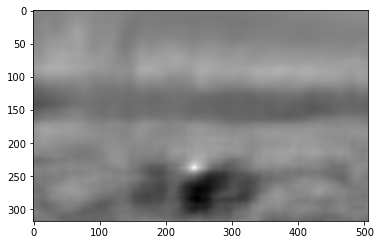

In [44]:
res = cv2.matchTemplate(img_g.astype(np.uint8), img_o.astype(np.uint8), method=cv2.TM_CCORR_NORMED)
plt.imshow(res, 'gray')